In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
Clase1=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset1.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
Clase2=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset2.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
Clase3=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset3.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
Clase4=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset4.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
Clase5=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset5.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
Clase6=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset6.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
Clase7=pd.read_csv("D:/MaestriaEA/Metodos estadísticos avanzados/UltimaClase/bending1/dataset7.csv",delimiter=",",skiprows=5,
                 names=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])

In [5]:
Clase1["Clase"]=[1 for i in range(len(Clase1))]
Clase2["Clase"]=[2 for i in range(len(Clase2))]
Clase3["Clase"]=[3 for i in range(len(Clase3))]
Clase4["Clase"]=[4 for i in range(len(Clase4))]
Clase5["Clase"]=[5 for i in range(len(Clase5))]
Clase6["Clase"]=[6 for i in range(len(Clase6))]
Clase7["Clase"]=[7 for i in range(len(Clase7))]

In [7]:
Clase7

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Clase
0,0,42.00,0.00,18.50,0.50,12.00,0.00,7
1,250,42.00,0.00,18.00,0.00,11.33,0.94,7
2,500,42.75,0.43,16.75,1.79,18.25,0.43,7
3,750,42.50,0.50,16.75,0.83,19.00,1.22,7
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,7
...,...,...,...,...,...,...,...,...
475,118750,44.25,0.83,16.25,1.30,24.00,0.00,7
476,119000,44.00,0.71,11.00,1.00,24.00,0.00,7
477,119250,44.25,0.43,10.25,1.30,22.75,0.83,7
478,119500,43.75,0.43,7.33,2.87,21.50,0.50,7


In [8]:
data=pd.concat([Clase1,Clase2,Clase3,Clase4,Clase5,Clase6,Clase7])

In [9]:
data=data.drop(columns="time")

In [10]:
data.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Clase
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.00000,3360.000000
mean,42.667723,0.454360,19.158830,0.793399,30.201982,0.55239,4.000000
std,2.361918,0.400185,4.553348,0.915341,5.761234,0.54323,2.000298
min,33.000000,0.000000,1.500000,0.000000,8.000000,0.00000,1.000000
25%,41.750000,0.000000,16.000000,0.000000,24.250000,0.00000,2.000000
50%,42.750000,0.470000,19.500000,0.500000,31.500000,0.47000,4.000000
75%,44.500000,0.500000,23.000000,1.120000,35.500000,0.87000,6.000000
max,48.000000,3.000000,30.000000,10.030000,38.670000,5.26000,7.000000


In [11]:
# Detección de valores atípicos
from collections import Counter
def detect_outliers(df,n,features):
    """
    Toma un marco de datos "df" de características y devuelve una lista de los índices
     correspondientes a las observaciones que contienen más de n valores atípicos según
     al método de Tukey.
    """
    outlier_indices = []
    
    # iterar sobre características (columnas)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # paso atípico
        outlier_step = 1.5 * IQR
        
        # Determinar una lista de índices de valores atípicos para la característica col.
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # Agregar los índices de valores atípicos encontrados para col a la lista de índices de valores atípicos
        outlier_indices.extend(outlier_list_col)
        
    # seleccionar observaciones que contengan más de 2 valores atípicos
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [12]:
# Detectar valores atípicos de Age, SibSp, Parch y Fare
Outliers_to_drop = detect_outliers(data.select_dtypes(include=np.number),2,data.select_dtypes(include=np.number).columns[:-1])

In [13]:
data.loc[Outliers_to_drop] # Mostrar las filas de valores atípicos

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Clase
241,37.25,1.30,24.00,0.00,37.50,1.50,1
241,42.25,0.43,21.00,0.00,33.75,1.30,2
241,44.20,0.75,19.75,0.83,35.40,1.20,3
241,36.67,0.94,26.00,1.22,34.67,1.25,4
241,42.00,0.00,18.25,0.43,32.00,0.00,5
...,...,...,...,...,...,...,...
468,43.00,0.71,19.50,0.50,36.00,0.00,3
468,44.50,0.50,25.50,0.50,30.00,0.00,4
468,41.25,0.83,15.00,0.00,27.00,0.00,5
468,38.00,1.58,23.25,1.30,14.00,2.45,6


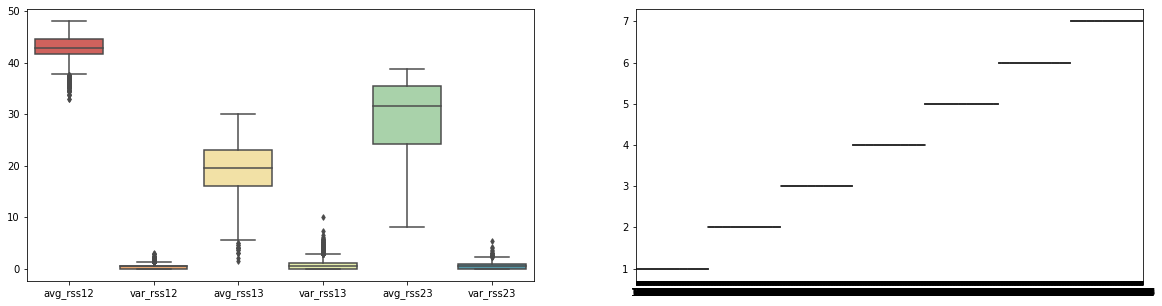

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["Clase"],fliersize=4,palette="Spectral")

plt.show()

In [15]:
len(data)

3360

In [16]:
#Eliminamos los outliers
data0 = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data0

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Clase
0,39.25,0.43,22.75,0.43,33.75,1.30,1
1,39.25,0.43,23.00,0.00,33.00,0.00,1
2,39.25,0.43,23.25,0.43,33.00,0.00,1
3,39.50,0.50,23.00,0.71,33.00,0.00,1
4,39.50,0.50,24.00,0.00,33.00,0.00,1
...,...,...,...,...,...,...,...
3124,44.25,0.83,16.25,1.30,24.00,0.00,7
3125,44.00,0.71,11.00,1.00,24.00,0.00,7
3126,44.25,0.43,10.25,1.30,22.75,0.83,7
3127,43.75,0.43,7.33,2.87,21.50,0.50,7


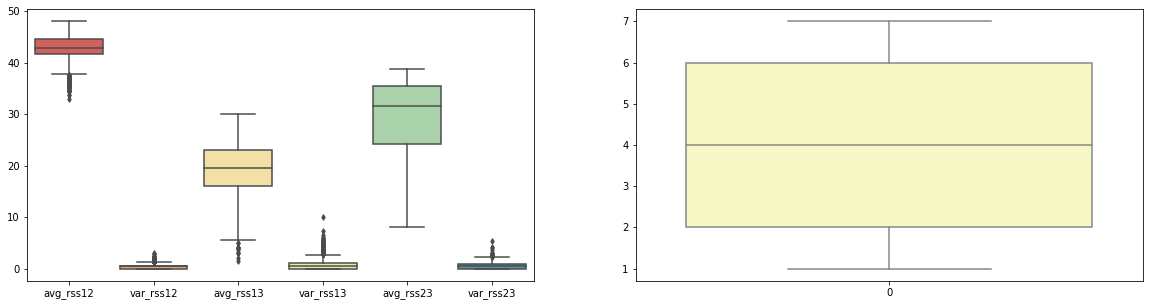

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(data=data0[data0.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data0["Clase"],fliersize=4,palette="Spectral")

plt.show()

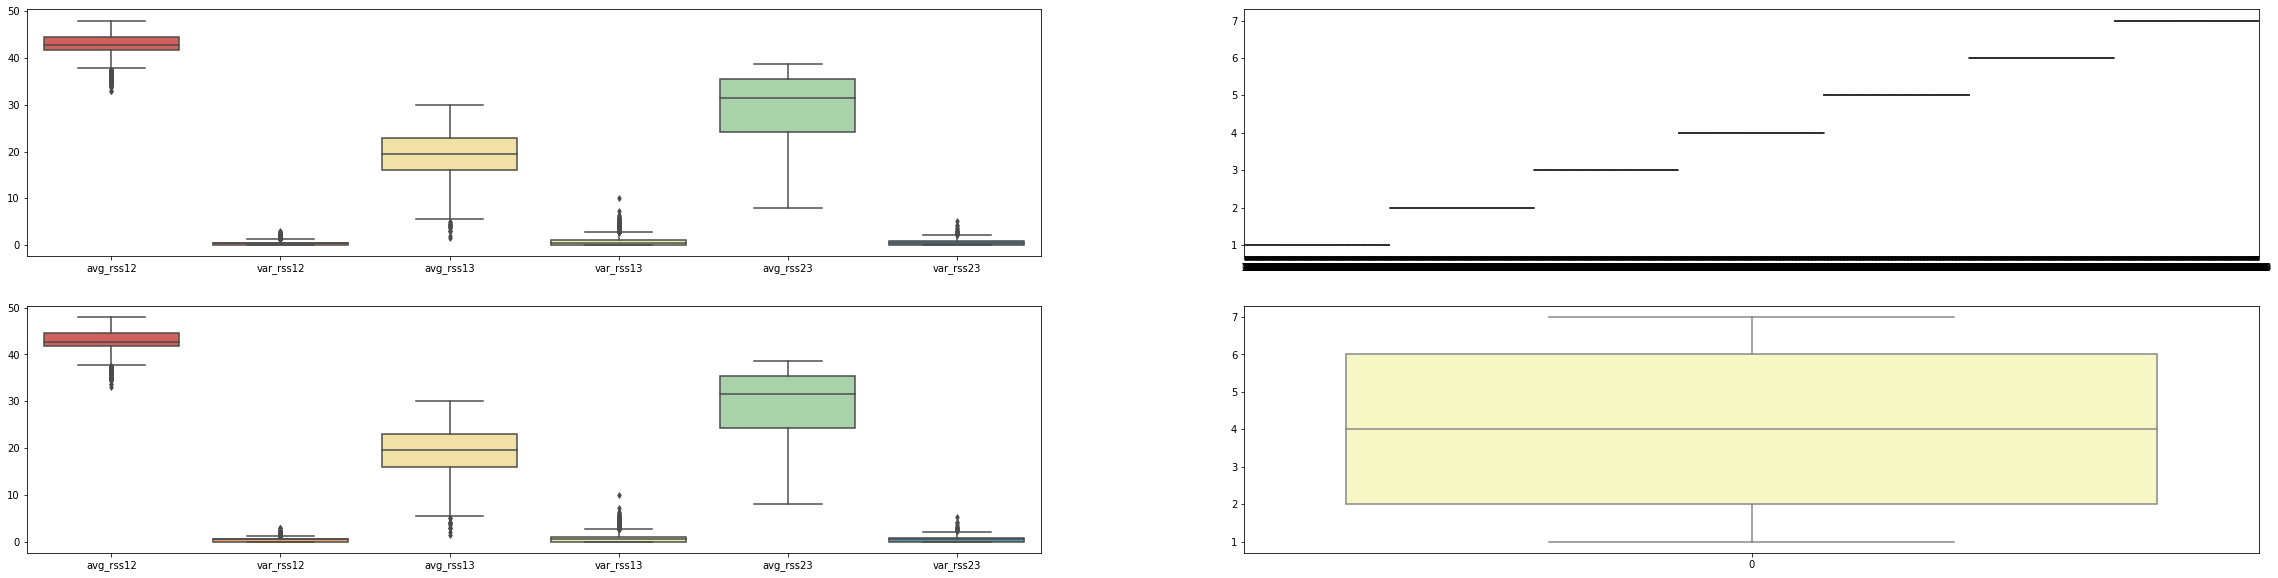

In [18]:
plt.figure(figsize=(40,10))
plt.subplot(221)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(222)
sb.boxplot(data=data["Clase"],fliersize=4,palette="Spectral")
plt.subplot(223)
sb.boxplot(data=data0[data0.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(224)
sb.boxplot(data=data0["Clase"],fliersize=4,palette="Spectral")

plt.show()

In [19]:
# Fill empty and NaNs values with NaN
data0=data0.fillna(np.nan)
# Check for Null values
data0.isnull().sum()

avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
Clase        0
dtype: int64

In [20]:
# Summarie and statistics (again)
data0.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Clase
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.00000
mean,42.739751,0.444401,19.180278,0.780508,30.217085,0.551662,4.00000
std,2.281229,0.382662,4.524165,0.896423,5.772740,0.539891,2.00032
min,33.000000,0.000000,1.500000,0.000000,8.000000,0.000000,1.00000
25%,41.750000,0.000000,16.000000,0.000000,24.250000,0.000000,2.00000
50%,42.750000,0.470000,19.500000,0.500000,31.500000,0.470000,4.00000
75%,44.500000,0.500000,23.000000,1.090000,35.500000,0.870000,6.00000
max,48.000000,3.000000,30.000000,10.030000,38.670000,5.260000,7.00000


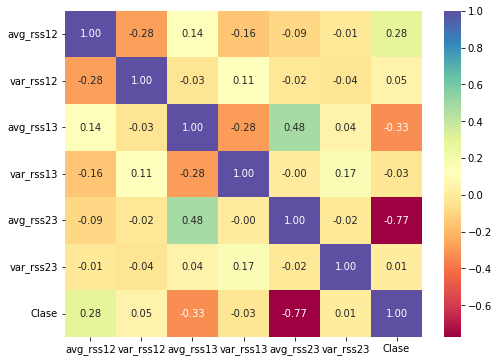

In [21]:
# Correlation matrix between numerical values
plt.figure(figsize=(8,6))
g = sb.heatmap(data0.corr(),annot=True, fmt = ".2f", cmap = "Spectral")
plt.show()

<Figure size 3600x216 with 0 Axes>

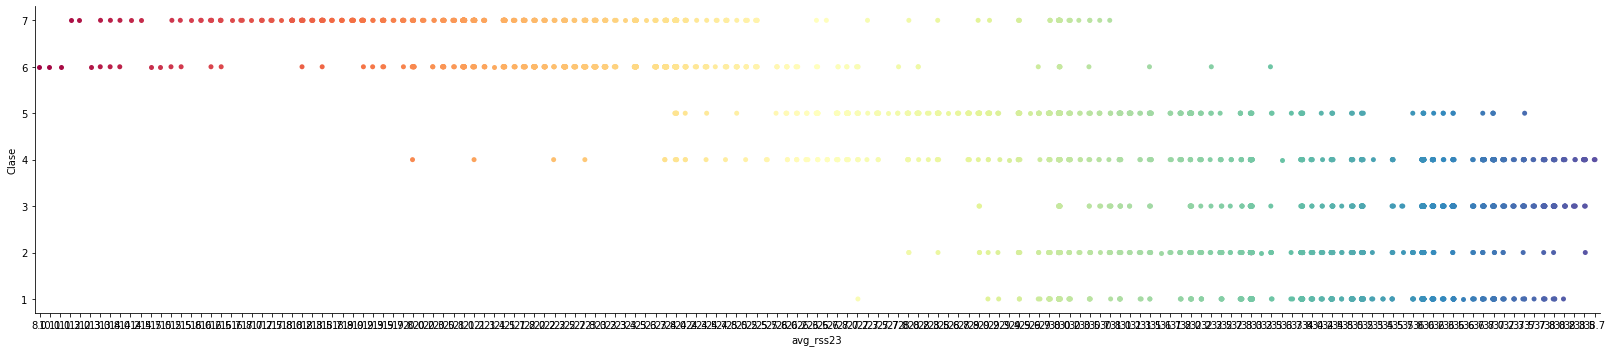

In [23]:
plt.figure(figsize=(50,3))
g = sb.catplot(x="avg_rss23",y="Clase",data=data0.round(1),kind="strip",height=5,aspect=4.5,palette="Spectral")
plt.show()

<Figure size 3600x216 with 0 Axes>

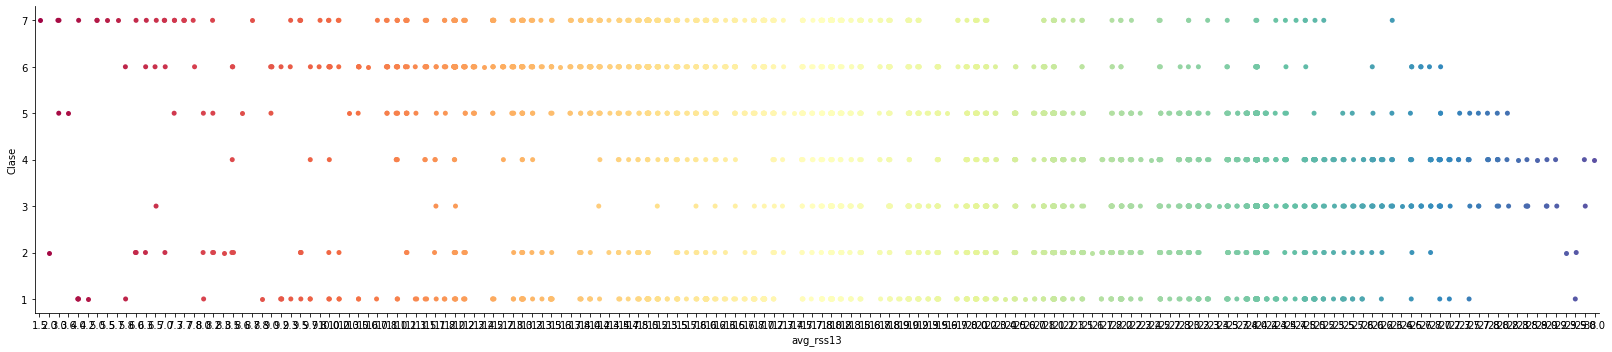

In [24]:
plt.figure(figsize=(50,3))
g = sb.catplot(x="avg_rss13",y="Clase",data=data0.round(1),kind="strip",height=5,aspect=4.5,palette="Spectral")
plt.show()

<Figure size 3600x216 with 0 Axes>

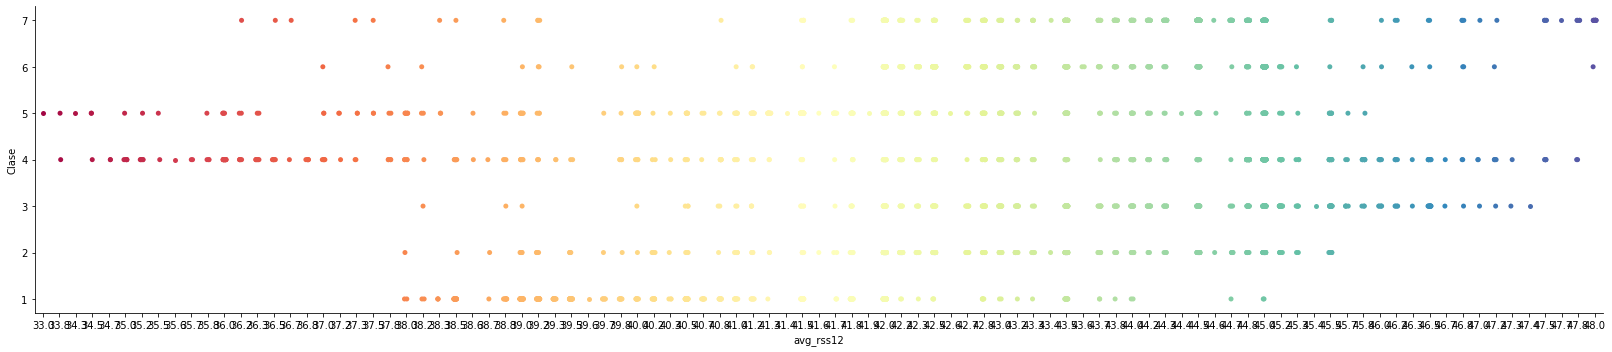

In [25]:
plt.figure(figsize=(50,3))
g = sb.catplot(x="avg_rss12",y="Clase",data=data0.round(1),kind="strip",height=5,aspect=4.5,palette="Spectral")
plt.show()

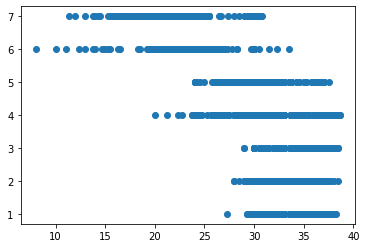

In [26]:
plt.scatter(data0["avg_rss23"],data0["Clase"])
plt.show()

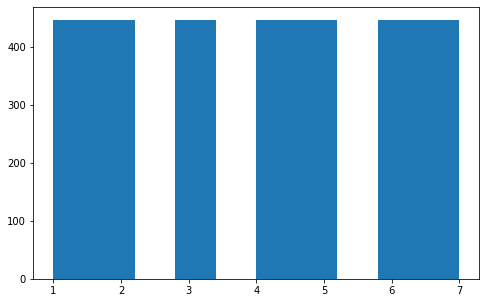

In [27]:
plt.figure(figsize=(8,5))
plt.hist(data0["Clase"])
plt.show()

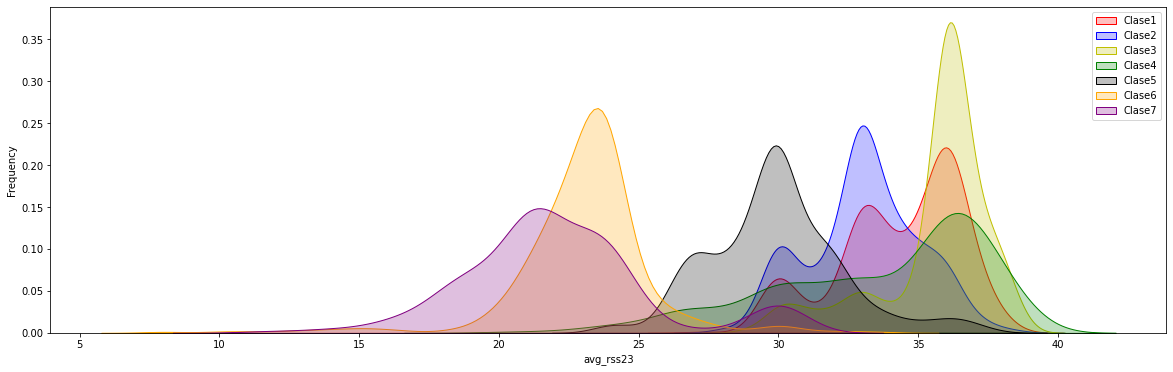

In [31]:
# Explore Age distibution 
plt.figure(figsize=(20,6))
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==1)],color="Red",shade=True)
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==2)],color="Blue",shade=True)
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==3)],color="y",shade=True)
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==4)],color="g",shade=True)
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==5)],color="k",shade=True)
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==6)],color="orange",shade=True)
g=sb.kdeplot(data0["avg_rss23"][(data0["Clase"]==7)],color="purple",shade=True)
g.set_xlabel("avg_rss23")
g.set_ylabel("Frequency")
g=g.legend(["Clase1","Clase2","Clase3","Clase4","Clase5","Clase6","Clase7"])

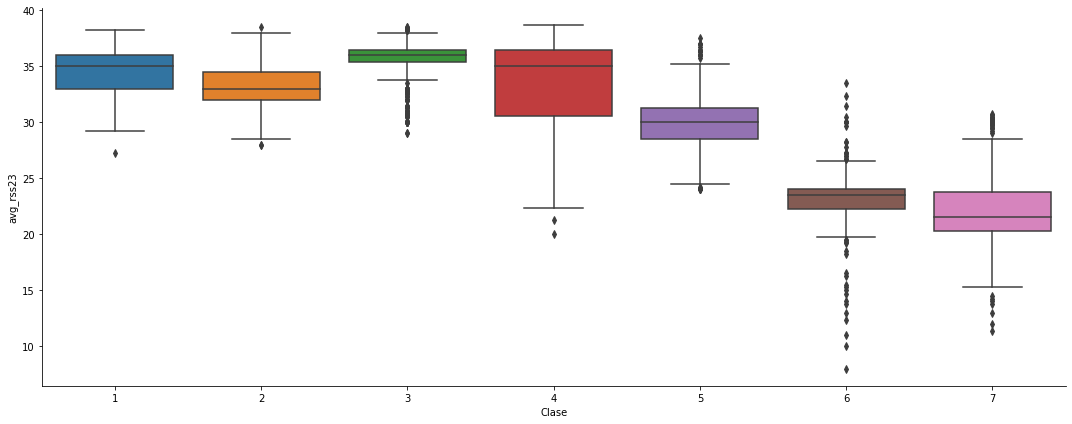

In [32]:
g=sb.catplot(x="Clase",y="avg_rss23",data=data0,kind="box",height=6,aspect=2.5)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=data0.drop(columns="Clase")
y=data0["Clase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)

In [54]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [36]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.

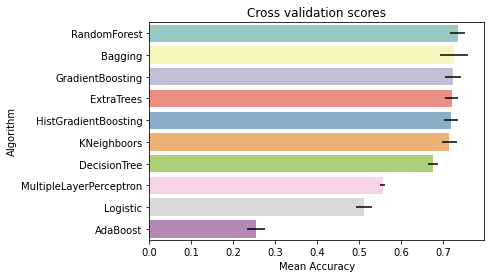

In [37]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=4))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(accuracy_score(y_pred,y_test))

cv_means = []
cv_std = []
cv_acc = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Accuracy":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [38]:
cv_res

,CrossValMeans,CrossValerrors,Accuracy,Algorithm
0,0.734744,0.018152,0.716360,RandomForest
4,0.726158,0.016678,0.695063,Bagging
2,0.723771,0.019528,0.707648,GradientBoosting
3,0.720433,0.014852,0.702807,ExtraTrees
5,0.719481,0.017889,0.711520,HistGradientBoosting
7,0.715176,0.007012,0.693127,KNeighboors
8,0.676535,0.019572,0.643756,DecisionTree
9,0.555829,0.021340,0.595353,MultipleLayerPerceptron
6,0.512406,0.012621,0.527590,Logistic
1,0.254306,0.034323,0.261375,AdaBoost


C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


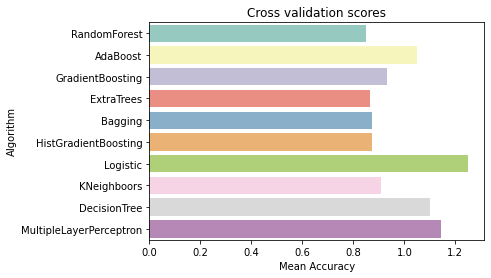

In [55]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X_train,y_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [65]:
AD = AdaBoostRegressor()
AD.fit(X_train,y_train)

LOG = GradientBoostingRegressor()
LOG.fit(X_train,y_train)

DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

MLPC = MLPRegressor()
MLPC.fit(X_train,y_train)

pred_AD=AD.predict(X_test)
pred_LOG=LOG.predict(X_test)
pred_DT=DT.predict(X_test)
pred_MLPC=MLPC.predict(X_test)

C:\Users\hmarbello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
for i,j in zip([pred_AD,pred_LOG,pred_DT,pred_MLPC],["AD","LOG","DT","MLPC"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  AD is  1.0262474886166135
RMSE for  LOG is  0.934101293491861
RMSE for  DT is  1.10264657835447
RMSE for  MLPC is  1.064371352218947


In [71]:
#voting : {'hard', 'soft'}
votingS = StackingRegressor(estimators=[('AdaBoost', AD),('Logistic', LOG),('DecisionTree',DT),('MLPC',MLPC)], n_jobs=4)
votingS = votingC.fit(X_train, y_train)
Rings_predicted_All_Voting_S = votingS.predict(X_test)

In [72]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Rings_predicted_All_Voting_S,y_test)))

RMSE for Voting is  0.895306600121392


In [73]:
#voting : {'hard', 'soft'}
votingC = VotingRegressor(estimators=[('AdaBoost', AD),('Logistic', LOG),('DecisionTree',DT),('MLPC',MLPC)], n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Rings_predicted_All_Voting = votingC.predict(X_test)

In [74]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Rings_predicted_All_Voting,y_test)))

RMSE for Stacking is  0.9097764282305125


In [76]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","HistGradientBoosting","MLPC","KNeighbors","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_AD),rmse(pred_LOG),rmse(pred_DT),rmse(pred_MLPC),rmse(Rings_predicted_All_Voting),rmse(Rings_predicted_All_Voting_S)]

In [77]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,HistGradientBoosting,MLPC,KNeighbors,Voting,Stacking
RMSE,1.026247,0.934101,1.102647,1.064371,0.909776,0.895307


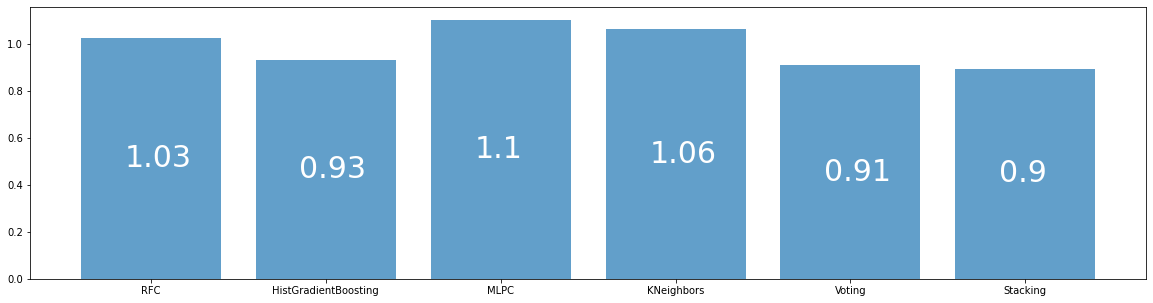

In [78]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

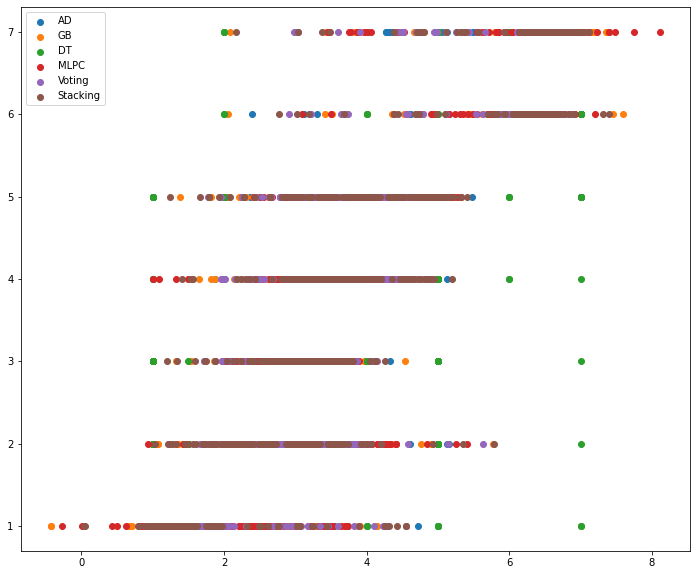

In [81]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_AD,pred_LOG,pred_DT,pred_MLPC,Rings_predicted_All_Voting,Rings_predicted_All_Voting_S],["AD","GB","DT","MLPC","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()

In [84]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

B = BaggingClassifier()
B.fit(X_train,y_train)

GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)

ET = ExtraTreesClassifier()
ET.fit(X_train,y_train)

pred_RFC=RFC.predict(X_test)
pred_B=B.predict(X_test)
pred_GB=GB.predict(X_test)
pred_ET=ET.predict(X_test)

In [86]:
for i,j in zip([pred_RFC,pred_B,pred_GB,pred_ET],["RFC","Bg","GB","ET"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  1.016323690157431
RMSE for  Bg is  1.027690198571572
RMSE for  GB is  1.0665194315937643
RMSE for  ET is  1.0393981429250165


In [87]:
#voting : {'hard', 'soft'}
votingC = VotingClassifier(estimators=[('rfc', RFC),('Bg', B),('GB',GB),('ET',ET)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Rings_predicted_All_Voting = votingC.predict(X_test)

In [88]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Rings_predicted_All_Voting,y_test)))

RMSE for Voting is  1.026276269630634


In [89]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingClassifier(estimators=[('rfc', RFC),('Bg', B),('GB',GB),('ET',ET)], stack_method='auto', n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
Rings_predicted_All_Stacking = stackingC.predict(X_test)

In [91]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","EXTC","MLPC","Log","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_B),rmse(pred_GB),rmse(pred_ET),rmse(Rings_predicted_All_Voting),rmse(Rings_predicted_All_Stacking)]

In [92]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,EXTC,MLPC,Log,Voting,Stacking
RMSE,1.016324,1.02769,1.066519,1.039398,1.026276,1.012028


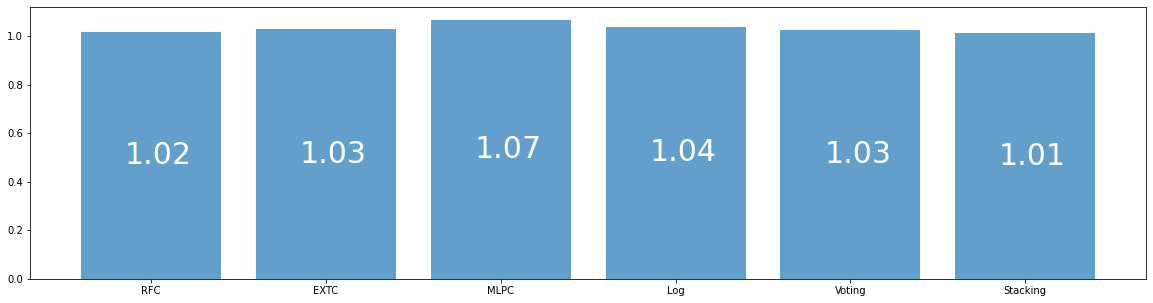

In [93]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

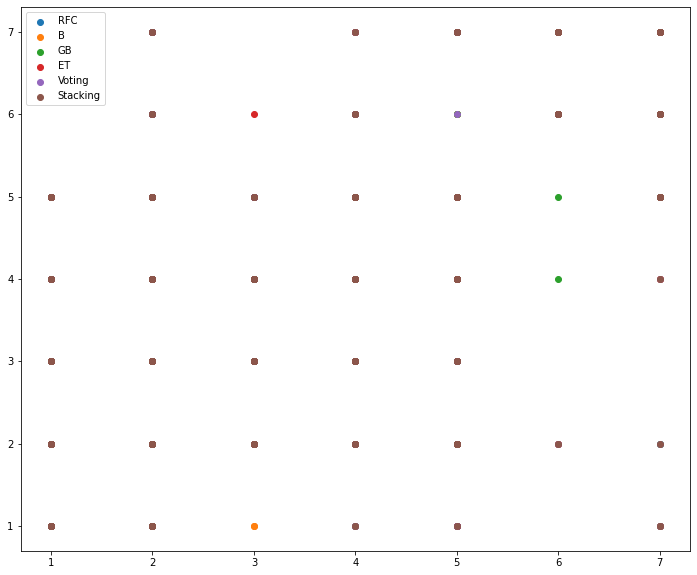

In [95]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_RFC,pred_B,pred_GB,pred_ET,Rings_predicted_All_Voting,Rings_predicted_All_Stacking],["RFC","B","GB","ET","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()